In [1]:
import nltk   # natural language tool kit

nltk.download('stopwords')  #  stopword 목록

## nltk 데이터 다운로드

nltk.download('wordnet')
nltk.download('punkt') 
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\JORON\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\JORON\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\JORON\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\JORON\AppData\Roaming\nltk_data...


True

## 데이터 불러오기

In [12]:
import pandas as pd

data = pd.read_csv('Hotel_reviews_20k.csv',  encoding='latin-1')
data = data[['rating_review','review_full']]
data.drop_duplicates(inplace=True)
data.head()

,rating_review,review_full
0,5,Been going to honk for quite a while . This ma...
1,1,We have been a frequent visitor at this chain ...
2,5,"Excellent staff, very cooperative and gentle ...."
3,4,I have always visit this place.they always off...
4,5,Lot of appraise about Chef Deepak Chef Wangmo ...


## 데이터 전처리

* stopword, tokenizer, stemmizer

In [13]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

stopWords = set(stopwords.words("english"))
lemma = WordNetLemmatizer()
stopWords

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [15]:
import re 


def tokenizer(text):

    text = re.sub(r"[^a-zA-Z]+", " ", str(text)) # 영문자만 남기기 
    #if re.match(r"[^a-zA-Z]+",  str(title)):
    #        print (title, "=>", EnWords)
    text = word_tokenize(text.lower()) # (소문자화후) 토큰 나누기 
    #print (EnWordsToken)
    EnWordsTokenStop = [w for w in text if w not in stopWords] # stopword
    #print (EnWordsTokenStop)
    EnWordsTokenStopLemma = [lemma.lemmatize(w) for w in EnWordsTokenStop] # lemmatize
    #print (EnWordsTokenStopLemma)
    return EnWordsTokenStopLemma

    
    


In [16]:
data["review_full_tokenized"]= data['review_full'].apply(tokenizer)



In [17]:
data.head()

,rating_review,review_full,review_full_tokenized
0,5,Been going to honk for quite a while . This ma...,"[going, honk, quite, man, falesh, always, top,..."
1,1,We have been a frequent visitor at this chain ...,"[frequent, visitor, chain, year, sad, restaura..."
2,5,"Excellent staff, very cooperative and gentle ....","[excellent, staff, cooperative, gentle, specia..."
3,4,I have always visit this place.they always off...,"[always, visit, place, always, offer, good, fo..."
4,5,Lot of appraise about Chef Deepak Chef Wangmo ...,"[lot, appraise, chef, deepak, chef, wangmo, se..."


In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer


# 짝수 번째 행의 리뷰를 훈련 데이터로 사용
# train_data = data.iloc[::2, :]

# 홀수 번째 행의 리뷰를 입력 데이터로 사용하여 rating 값을 예측
# test_data = data.iloc[1::2, :]

# 리뷰를 특성 벡터로 변환하기 위한 TF-IDF 벡터화
vectorizer = TfidfVectorizer(ngram_range=(1,1), min_df=3, max_df=0.9) # 3개 미만 문서에 나오는 단어 제거, 90%이상 문서에 나오는 단어제거
# vectorized_df = vectorizer.fit_transform(data['review_full_tokenized'].apply(lambda x: ' '.join(x)))
# X_test = vectorizer.transform(test_data['processed_review'].apply(lambda x: ' '.join(x)))
vectorized_df = vectorizer.fit_transform(data['review_full_tokenized'].apply(lambda x: ' '.join(x)))

In [31]:
vectorized_df[::2]
vectorized_df[1::2]

<9998x10620 sparse matrix of type '<class 'numpy.float64'>'
	with 326641 stored elements in Compressed Sparse Row format>

In [32]:
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense




# TF-IDF 벡터화
vectorizer = TfidfVectorizer(ngram_range=(1, 1), min_df=3, max_df=0.9)
vectorized_df = vectorizer.fit_transform(data['review_full_tokenized'].apply(lambda x: ' '.join(x)))


# 짝수 번째 행의 리뷰를 훈련 데이터로 사용
train_X = vectorized_df[::2]
test_X = vectorized_df[1::2]

train_Y = data['rating_review'].iloc[::2, :]
test_y = data['rating_review'].iloc[1::2, :]

# LSTM 모델 생성
model = Sequential()
model.add(LSTM(128, input_shape=(train_X.shape[1],)))
model.add(Dense(5, activation='softmax'))  # 다중 클래스 분류를 위한 출력 레이어

# 모델 컴파일
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


# 모델 훈련
model.fit(train_X, train_Y, epochs=10, batch_size=32)

ModuleNotFoundError: No module named 'tensorflow.python'

## 단어 빈도 탐색

- Counter ( 리스트 ) : count dictionary 생성

In [10]:
from collections import Counter

count = Counter(words2)

word_count = {}

for tag, counts in count.most_common(50):
    if(len(str(tag))>1):
        word_count[tag] = counts
        print("%s : %d" % (tag, counts))


food : 19041
good : 12245
place : 11972
service : 8535
restaurant : 8477
one : 6162
great : 5366
time : 4898
staff : 4396
chicken : 4330
dish : 4219
taste : 4034
indian : 4004
delhi : 3840
also : 3800
like : 3751
nice : 3689
visit : 3606
really : 3479
best : 3440
experience : 3403
well : 3371
menu : 3302
would : 2856
ordered : 2823
ambience : 2764
go : 2719
try : 2657
served : 2504
amazing : 2444
table : 2367
get : 2364
quality : 2330
must : 2319
friend : 2257
excellent : 2250
went : 2190
meal : 2173
drink : 2171
delicious : 2161
dinner : 2116
even : 2101
much : 2092
price : 2019
veg : 1919
order : 1863
made : 1856
quite : 1745
hotel : 1722


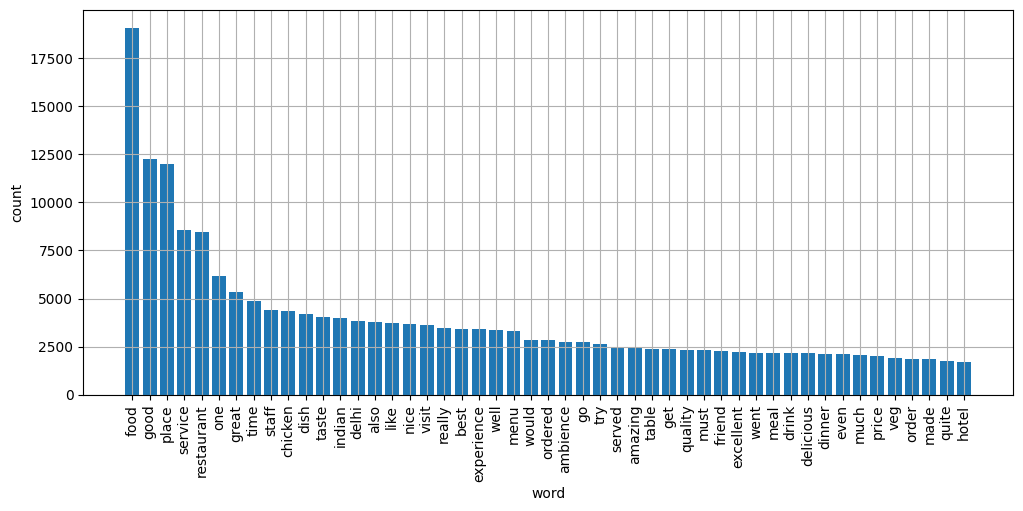

In [11]:
import matplotlib.pyplot as plt

# 히스토그램 표시 옵션 
plt.figure(figsize=(12,5))
plt.xlabel("word")
plt.ylabel("count")
plt.grid(True)

sorted_Keys = sorted(word_count, key=word_count.get, reverse=True)
sorted_Values = sorted(word_count.values(), reverse=True)

plt.bar(range(len(word_count)), sorted_Values, align='center')
plt.xticks(range(len(word_count)), list(sorted_Keys), rotation='vertical')

plt.show()

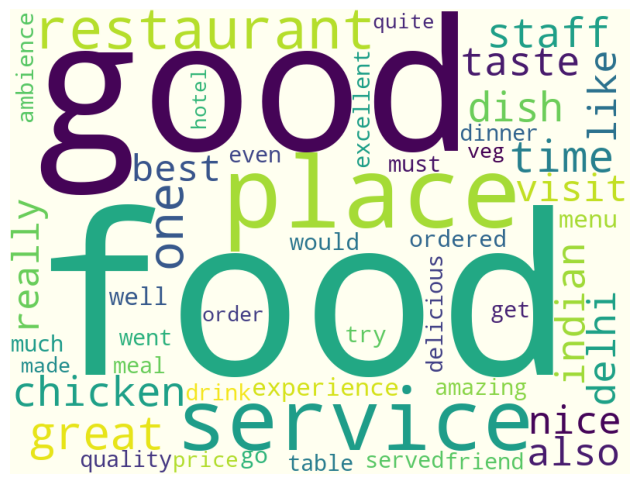

In [12]:
from wordcloud import WordCloud



wc=WordCloud(background_color='ivory', width=800, height=600)
cloud=wc.generate_from_frequencies(word_count)

plt.figure(figsize=(8,8))
plt.imshow(cloud)
plt.axis('off')
plt.show()

In [13]:
len(words) # 전체 리뷰 개수

20000

In [44]:
data['processed_review'] = words
data.head()

,rating_review,review_full,processed_review
0,5,Been going to honk for quite a while . This ma...,"[going, honk, quite, man, falesh, always, top,..."
1,1,We have been a frequent visitor at this chain ...,"[frequent, visitor, chain, year, sad, restaura..."
2,5,"Excellent staff, very cooperative and gentle ....","[excellent, staff, cooperative, gentle, specia..."
3,4,I have always visit this place.they always off...,"[always, visit, place, always, offer, good, fo..."
4,5,Lot of appraise about Chef Deepak Chef Wangmo ...,"[lot, appraise, chef, deepak, chef, wangmo, se..."


In [30]:
# ## 문자열 합치기
# data['processed_review'] = data['processed_review'].apply(lambda x : ' '.join(x))
# data.head()

,rating_review,review_full,processed_review
0,5,Been going to honk for quite a while . This ma...,g o i n g ...
1,1,We have been a frequent visitor at this chain ...,f r e q u e ...
2,5,"Excellent staff, very cooperative and gentle ....",e x c e l l ...
3,4,I have always visit this place.they always off...,a l w a y s ...
4,5,Lot of appraise about Chef Deepak Chef Wangmo ...,l o t a p ...


In [45]:
from sklearn.feature_extraction.text import TfidfVectorizer


# 짝수 번째 행의 리뷰를 훈련 데이터로 사용
train_data = data.iloc[::2, :]

# 홀수 번째 행의 리뷰를 입력 데이터로 사용하여 rating 값을 예측
test_data = data.iloc[1::2, :]

# 리뷰를 특성 벡터로 변환하기 위한 TF-IDF 벡터화
vectorizer = TfidfVectorizer(ngram_range=(1,1), min_df=3, max_df=0.9) # 3개 미만 문서에 나오는 단어 제거, 90%이상 문서에 나오는 단어제거
X_train = vectorizer.fit_transform(train_data['processed_review'].apply(lambda x: ' '.join(x)))
X_test = vectorizer.transform(test_data['processed_review'].apply(lambda x: ' '.join(x)))


In [47]:
from sklearn.linear_model import LogisticRegression

SA_lr = LogisticRegression(random_state = 0)

SA_lr.fit(X_train, train_data['rating_review']) # X, y

c:\Users\JORON\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

In [48]:
from sklearn.model_selection import GridSearchCV

params = {'C': [1, 3, 3.5, 4, 4.5, 5]}
SA_lr_grid_cv = GridSearchCV(SA_lr, param_grid=params, cv=3, scoring='accuracy', verbose=1)

In [49]:
SA_lr_grid_cv.fit(X_train, train_data['rating_review'])

Fitting 3 folds for each of 6 candidates, totalling 18 fits


c:\Users\JORON\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\JORON\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

GridSearchCV(cv=3, estimator=LogisticRegression(random_state=0),
             param_grid={'C': [1, 3, 3.5, 4, 4.5, 5]}, scoring='accuracy',
             verbose=1)

In [50]:
print(SA_lr_grid_cv.best_params_, round(SA_lr_grid_cv.best_score_, 4))

{'C': 1} 0.6102


In [51]:
# 최적 파라미터의 best 모델 저장
SA_lr_best = SA_lr_grid_cv.best_estimator_

In [52]:

test_predict = SA_lr_best.predict(X_test)


In [55]:
from sklearn.metrics import accuracy_score

print('감성 분석 정확도 : ', round(accuracy_score(test_data['rating_review'], test_predict), 3))

감성 분석 정확도 :  0.634


## lstm

In [57]:
import pandas as pd
import numpy as np
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense


In [58]:
# 리뷰와 레이블 데이터 추출
reviews = data['processed_review'].apply(lambda x : ' '.join(x))
labels = data['rating_review']

# 텍스트 데이터 전처리
tokenizer = Tokenizer()
tokenizer.fit_on_texts(reviews)
word_index = tokenizer.word_index
sequences = tokenizer.texts_to_sequences(reviews)
max_sequence_length = max([len(seq) for seq in sequences])
padded_sequences = pad_sequences(sequences, maxlen=max_sequence_length)

# 레이블 데이터 정규화
normalized_labels = (labels - labels.min()) / (labels.max() - labels.min())

# LSTM 모델 구축
embedding_dim = 100
vocab_size = len(word_index) + 1

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim, input_length=max_sequence_length))
model.add(LSTM(64))
model.add(Dense(1, activation='linear'))

model.compile(loss='mean_squared_error', optimizer='adam')

# 모델 훈련
model.fit(padded_sequences, normalized_labels, epochs=10, batch_size=32, validation_split=0.2)


Epoch 1/10
500/500 [==============================] - 148s 294ms/step - loss: 0.0551 - val_loss: 0.0422
Epoch 2/10
500/500 [==============================] - 146s 291ms/step - loss: 0.0249 - val_loss: 0.0390
Epoch 3/10
500/500 [==============================] - 144s 289ms/step - loss: 0.0157 - val_loss: 0.0412
Epoch 4/10
500/500 [==============================] - 146s 292ms/step - loss: 0.0111 - val_loss: 0.0419
Epoch 5/10
500/500 [==============================] - 144s 288ms/step - loss: 0.0084 - val_loss: 0.0448
Epoch 6/10
500/500 [==============================] - 144s 289ms/step - loss: 0.0065 - val_loss: 0.0445
Epoch 7/10
500/500 [==============================] - 144s 287ms/step - loss: 0.0053 - val_loss: 0.0442
Epoch 8/10
500/500 [==============================] - 144s 288ms/step - loss: 0.0046 - val_loss: 0.0453
Epoch 9/10
500/500 [==============================] - 148s 296ms/step - loss: 0.0039 - val_loss: 0.0447
Epoch 10/10
313/313 [==============================] - 25s 80ms/

In [63]:
# 테스트 데이터 예측
test_sequences = tokenizer.texts_to_sequences(test_data['processed_review'].apply(lambda x: ' '.join(x)))
padded_test_sequences = pad_sequences(test_sequences, maxlen=max_sequence_length)
predicted_ratings = model.predict(padded_test_sequences)

# 예측 결과 출력
for i, rating in enumerate(predicted_ratings):
    score = rating * (labels.max() - labels.min()) + labels.min()
    score = np.around(score).astype(int)
    print(f"Predicted rating for review {i+1}: {score}")

313/313 [==============================] - 28s 88ms/step
Predicted rating for review 1: [1]
Predicted rating for review 2: [4]
Predicted rating for review 3: [3]
Predicted rating for review 4: [4]
Predicted rating for review 5: [4]
Predicted rating for review 6: [5]
Predicted rating for review 7: [3]
Predicted rating for review 8: [5]
Predicted rating for review 9: [5]
Predicted rating for review 10: [5]
Predicted rating for review 11: [5]
Predicted rating for review 12: [5]
Predicted rating for review 13: [5]
Predicted rating for review 14: [5]
Predicted rating for review 15: [4]
Predicted rating for review 16: [5]
Predicted rating for review 17: [5]
Predicted rating for review 18: [5]
Predicted rating for review 19: [4]
Predicted rating for review 20: [2]
Predicted rating for review 21: [5]
Predicted rating for review 22: [3]
Predicted rating for review 23: [3]
Predicted rating for review 24: [1]
Predicted rating for review 25: [3]
Predicted rating for review 26: [3]
Predicted rating

In [60]:
from sklearn.metrics import mean_squared_error

# 테스트 데이터의 실제 rating 값
y_test = test_data['rating_review']

# 예측 결과의 역정규화
predicted_ratings = (predicted_ratings * (labels.max() - labels.min())) + labels.min()

# 예측 결과의 RMSE 계산
rmse = np.sqrt(mean_squared_error(y_test, predicted_ratings))
print("RMSE:", rmse)

RMSE: 0.43566164209256486
